<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
House prices in Beijing (EDA & Analysis)
</font>
</h1>

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
The dataset
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
The Skyrocketing of housing prices over the last decade in China’s megacities have generated broad concerns. The idea behind this project is to have a better understanding on how the prices changed during the past decade and the why behind.
</font>
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians

housing = pd.read_csv('housing_data.csv', encoding='gbk')

C:\Users\Ilya Jafari\AppData\Local\Temp\ipykernel_14400\4180116385.py:7: DtypeWarning: Columns (2,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('housing_data.csv', encoding='gbk')


<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Let's have a look at the data:</font>
</p>

In [2]:
housing.shape

(318851, 22)

In [3]:
housing.head(5)

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
The columns description:</p>

<center>
<table style="align: center; text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
  <tr>
      <td><code>Unnamed: 0</code></td><td>The indexes of the data. Basically useless for this project!</td>
</tr>

  <tr>
      <td><code>url</code></td><td>URL of the deal</td>
</tr>
 

<tr>
      <td><code>id</code></td><td>ID of the transaction (the deal)</td>
</tr>
 
<tr>
      <td><code>Lng</code></td><td>Longitude of the house</td>
</tr>
 
  
<tr>
      <td><code>Lat</code></td><td>Latitude of the house</td>
</tr>
 
  
<tr>
      <td><code>Cid</code></td><td>ID of the customer</td>
</tr>
 
       
 
<tr>
      <td><code>tradeTime</code></td><td>Time of the deal</td>
</tr>    

 
<tr>
      <td><code>DOM</code></td><td>The number of days that have passed since posting the house ad.</td>
</tr>    

<tr>
      <td><code>totalPrice</code></td><td>The final price of the house</td>
</tr>    
  
<tr>
      <td><code>square</code></td><td>The size of the house</td>
</tr>       

<tr>
      <td><code>livingRoom</code></td><td># of living rooms</td>
</tr>       


    
<tr>
      <td><code>drawingRoom</code></td><td># of drawing rooms</td>
</tr>       

    
    
<tr>
      <td><code>kitchen</code></td><td># of kitchens</td>
</tr>       

        
<tr>
      <td><code>bathRoom</code></td><td># of bathooms</td>
</tr>       


<tr>
      <td><code>floor</code></td><td># of floors</td>
</tr>       

    
<tr>
      <td><code>constructionTime</code></td><td>The year of construction</td>
</tr>       
  
  
    
<tr>
      <td><code>renovationCondition</code></td><td>The renovation condition</td>
</tr>       
  
    
<tr>
      <td><code>buildingStructure</code></td><td>Building's structure</td>
</tr>                   
  
<tr>
      <td><code>elevator</code></td><td>Has elevator?</td>
</tr>       
  
  
<tr>
      <td><code>subway</code></td><td>Subway accessibility?</td>
</tr>    
    
  
<tr>
      <td><code>district</code></td><td>Which district?</td>
</tr>    
    

</table>

</center>

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Pre-processing: Part 1
</font>
</h2>
<p  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
I droped the <code>url</code>, <code>id</code> and <code>Cid</code> columns and the first column which was the data index and then, I assigned the new dataframe to <code>housing_dropped</code> 
</font>
</p>


In [4]:
housing_dropped = housing.drop(columns=['Unnamed: 0', 'Cid', 'id', 'url'])
housing_dropped.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


In [5]:
housing_dropped.isna().sum()

Lng                         0
Lat                         0
tradeTime                   0
DOM                    157977
totalPrice                  0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
subway                     32
district                    0
dtype: int64

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
The <code>DOM</code> column, which indicates the number of days the ad has been on the site, has a lot of missing values, and if we want to remove the rows with missing <code>DOM</code> values, almost half of Our data will be deleted! On the other hand, this feature has important consequences for houses, and removing the <code>DOM</code> column is not a sensible thing to do.
So I have to think about filling the empty values of this column.
</font>
</p>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
I can use the column mean or mode to fill in the blank values. Let's take a look at the box plot for better decision making.
</font>
</p>


<Axes: >

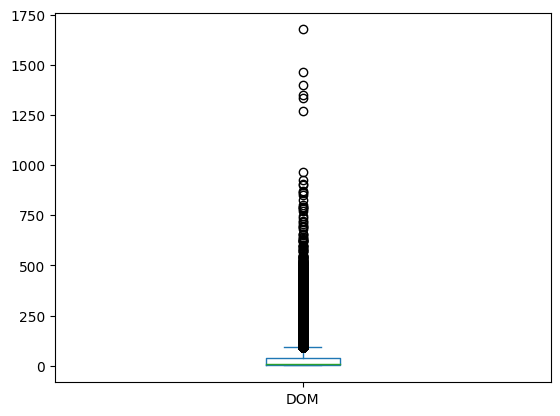

In [6]:
housing_dropped.DOM.plot(kind = 'box')

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Unfortunately, there is a lot of outliers in this column. In this situation, using mode will be a better option.
First, with the help of the <code>copy</code> method, I take a copy of the main dataframe to continu handlinge the missing valuet. I name this new dataframe <code>housing_no_missing</code>.
</font>
</p>

In [7]:
housing_no_missing = housing_dropped.copy()

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Pre-processing: Part 2
</font>
</h2>
<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In the <code>housing_no_missing</code> dataframe, I replaced the empty values of the <code>DOM</code> column with its mode. After that, I droped the rows where <code>elevator</code> or <code>subway</code> values are empty.
</font>
</p>

In [8]:
mode = housing_no_missing['DOM'].mode()[0]
housing_no_missing['DOM'] = housing_no_missing['DOM'].fillna(mode)
housing_no_missing.dropna(subset=['elevator', 'subway'], inplace=True)

In [9]:
housing_no_missing.isna().sum()

Lng                    0
Lat                    0
tradeTime              0
DOM                    0
totalPrice             0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
subway                 0
district               0
dtype: int64

In [10]:
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Pre-processing: Part 3
</font>
</h2>
<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this section, I will convert the numerical and non-numerical data of the data set into the appropriate format so that I do not face any challenge in performing the analysis. I will also remove outliers (too expensive or too cheap houses).
</font>
</p>

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Appropriate format for categorical values.
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Some of the columns have categorical values. Columns such as elevator, building type, renovation conditions, etc. In order to be safe, I convert these numbers into their string equivalent.
<br>
I used these tables for conversion:
</font>
</p>

<center>
<table>
<tr>
    <td><b><code>elevator</code></b></td>    
</tr>    
<tr>    
<td>1</td> <td>'has elevator'</td>
</tr>
<tr>     
<td>0</td> <td>'no elevator'</td>    
</tr>
</table>   

<br>       

<table>
<tr>
    <td><b><code>subway</code></b></td>    
</tr>        
<tr>    
<td>1</td> <td>'has subway'</td>
</tr>
<tr>     
<td>0</td> <td>'no subway'</td>    
</tr>        
</table>   
<br>        


<table>
<tr>
<td><b><code>buildingStructure</code></b></td>    
</tr>     
<tr>    
<td>1</td> <td>'unknown'</td>
</tr>
<tr>     
<td>2</td> <td>'mixed'</td>    
</tr>
            
<tr>     
<td>3</td> <td>'brick and wood' </td>    
</tr>
            
<tr>     
<td>4</td> <td>'concrete'</td>    
</tr>
            
<tr>     
<td>5</td> <td>'steel'</td>    
</tr>
            
<tr>     
<td>6</td> <td>'steel-concrete composite'</td>    
</tr>            
</table> 
<br>
        

<table>
<tr>
<td><b><code>renovationCondition</code></b></td>    
</tr>      
<tr>    
<td>1</td> <td>'other'</td>
</tr>
<tr>     
<td>2</td> <td>'rough'</td>    
</tr>
            
<tr>     
<td>3</td> <td>'Simplicity' </td>    
</tr>
            
<tr>     
<td>4</td> <td>'hardcover'</td>    
</tr>
                 
</table>

</center>

In [11]:
housing_categorical = housing_no_missing.copy()

housing_categorical.replace({'elevator':{1 : 'has elevator' ,0 : 'no elevator'}, 'subway':{1 : 'has subway' ,0 : 'no subway'}, 
                             'buildingStructure':{1 : 'unknown' ,2 : 'mixed' ,3 : 'brick and wood' ,4 : 'concrete' ,5 : 'steel' ,6 : 'steel-concrete composite'}, 
                             'renovationCondition':{1 : 'other' ,2 : 'rough' ,3 : 'Simplicity' ,4 : 'hardcover'}},inplace=True)

housing_categorical.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


In [12]:
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  object 
 13  buildingStructure    318819 non-null  object 
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Appropriate format for numerical values.
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Columns that have a string value are of type <code>Object</code>. If we pay more attention, we can see that some numerical columns (such as the year the house was built and the height of the house) are also stored in the form of <code>object</code>. In the next step, I will convert these columns to a numerical value.
<br>
It is better to first see the unique values of these columns
</font>
</p>

In [13]:
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Let's take a look at the unique values of the <code>constructionTime</code> column. For some houses, there is a Chinese phrase that has an unclear meaning for me. The number of such houses is small, so we can exclude houses that its year of construction is unknown.
<br>
In this section, I will drop the houses that their construction year is not known and then change the <code>constructionTime</code> column type to <code>int</code>. I set the name of the new data frame to <code>housing_construction</code>.
</font>
</p>

In [14]:
housing_construction = housing_categorical.copy()

housing_construction = housing_construction[housing_construction["constructionTime"].str.contains("未知") == False] 
housing_construction["constructionTime"] = housing_construction["constructionTime"].astype(int)
housing_construction.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Now we go to the <code>floor</code> column, which has a slightly different story. In values of this column, a Chinese word is placed first and then a number. The number after the Chinese character shows the height of the house. After using google translate, I realized that those words are equivalent to high, low and average. This column can be converted into two different columns, but I will remove the Chinese expressions here and only keep the numbers.
</font>
</p>


In [15]:
housing_floor = housing_construction.copy()

housing_floor["floor"] = housing_floor["floor"].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

housing_floor.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1


In [17]:
housing_floor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299536 entries, 0 to 318849
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  object 
 7   drawingRoom          299536 non-null  object 
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  object 
 10  floor                299536 non-null  int32  
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator             2

<h1  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Handling Outliers
</font>
</h1>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
They may be very big or very expensive houses or on the contrary, they may be houses that are too cheap or too small. In some data analysis tasks, outliers can change the results in an unfavorable way. For example, the graphs are garbled or, in machine learning tasks, the data may mislead the algorithm. In this section, I will remove some houses that have one or more unusual features.
</font>
</p>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
One of the best ways to identify and remove outliers is to use quartiles and box plots.
So first I draw a box plot of the price column.
</font>
</p>

''

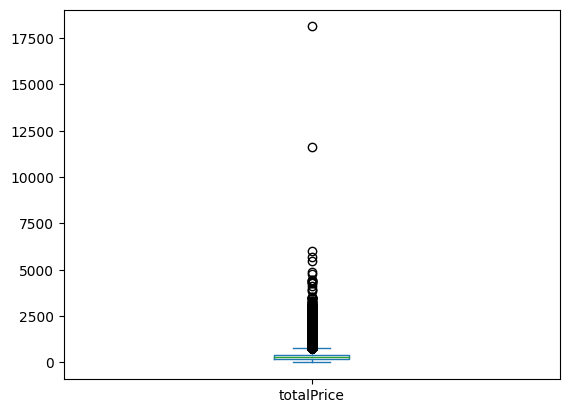

In [19]:
housing_floor.totalPrice.plot(kind = 'box')
;

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Some data are so outliers that the box plot is out of box! The points at the top of the graph are highly outlier data.
<br>
To remove outliers using this technique, I use the first and third quartiles to select the appropriate area. This area, which is called <code>IQR</code>, is the difference between the first and third quartiles. A number is then multiplied by the <code>IQR</code> and values that are less than or greater than this new range are discarded.
<br>
I remove the houses where total price does not fall within the range of 1.5 times the interquartile range and put the result in the <code>housing_no_outlier</code> data frame.
</font>
</p>


In [20]:
Q1 = housing_floor['totalPrice'].quantile(.25)
Q3 = housing_floor['totalPrice'].quantile(.75)
IQR = Q3 - Q1

housing_no_outlier = housing_floor.copy()
housing_no_outlier.drop(housing_no_outlier[(housing_no_outlier.totalPrice < Q1-1.5*IQR) | (housing_no_outlier.totalPrice > Q3+1.5*IQR)].index , inplace = True)

print('Number of removed outliers : ', housing_floor.shape[0] - housing_no_outlier.shape[0])

Number of removed outliers :  14496


<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Let's take a look at the bar graph of the <code>totalPrice</code> column. As you can see, the graph has taken on a more natural state:
</font>
</p>

''

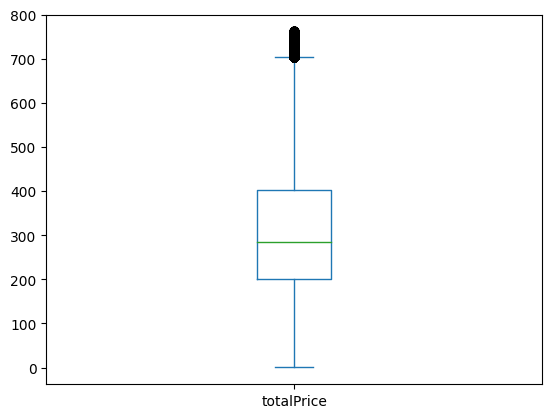

In [22]:
housing_no_outlier.totalPrice.plot(kind = 'box')
;

<h1  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Adding new features
</font>
</h1>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
The Beijing City Houses dataset provides us with very useful information, but sometimes new features can be generated using existing features. For example, by having the total area and price of each house, we can calculate the price per square meter for each house, which is an important feature in the analysis of housing information. In this part of the project, I will add two new features to the dataset, and then with the visualization tools, I will start drawing graphs to explore the relationships between the features.
</font>
</p>

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
New features: Part 1
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
One of the interesting things that can be done in such analysis is creating new features based on existing features. Of course, this should be done under the condition that the new feature is considered a useful feature.
<br><br>
As the first step, I calculate the distance of each house to the center of the Chinese capital and store it in a column named <code>distanceToCapital</code>.
The (<code>longitude</code>) and (<code>latitude</code>) of the center of the Chinese capital are <code>116.4074</code> and <code>39.9042</code> respectively.
<br><br>
The formula below can be used to calculate the distance.
But be careful, all angles must be converted to radians. I stored the new dataframe in <code>housing_capital</code>.
</font>
</p>

$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$ 
$$ λ: \text{longitude} $$ 

In [23]:
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

housing_capital = housing_no_outlier.copy()
housing_capital['distanceToCapital'] = np.arccos(housing_capital['Lat'].apply(lambda x: np.sin(radians(x))) * np.sin(capital_Lat) + housing_capital['Lat'].apply(lambda x: np.cos(radians(x))) * np.cos(capital_Lat) * np.cos(capital_Lng - housing_capital['Lng'].apply(lambda x: radians(x)))) * 6371.0088

housing_capital.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335
5,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652


<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
New features: Part 2
</font>
</h2>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this dataset, the traded price and the size of each house are known. But the price per square meter of the house is not known. In the <code>pricePerSquare</code> column, I calculate and store the price per square meter of the house. Note that the total price is based on <i>million yuan</i>. Therefore, the price calculated for each square meter of the house must be multiplied by a thousand to get the price based on <i>Yuan</i>. 
<br><br>
I set the name of the resulting dataframe equal to <code>housing_PPS</code>.
</font>
</p>

In [24]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = (housing_PPS["totalPrice"] / housing_PPS["square"]) * 1000

housing_PPS.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
5,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


<h1  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Visualization
</font>
</h1>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
We want to extract information according to our needs by illustrating data in various ways. Our dataset has no missing values, no outliers, and no columns stored in the wrong format.
</font>
</p>

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Let's take a look at the histogram of the numerical columns.
<br>
    According to the graph below, the price of the house has a curve towards the price of 200 million yuan. Most of the houses were built around 2000. The longest distance from the center of the capital is 40 km. Most houses have two hall rooms. More information can be extracted from this chart.
</font>
</p>

C:\Users\Ilya Jafari\AppData\Local\Temp\ipykernel_14400\60454985.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_PPS.hist(ax = ax, bins = 20);


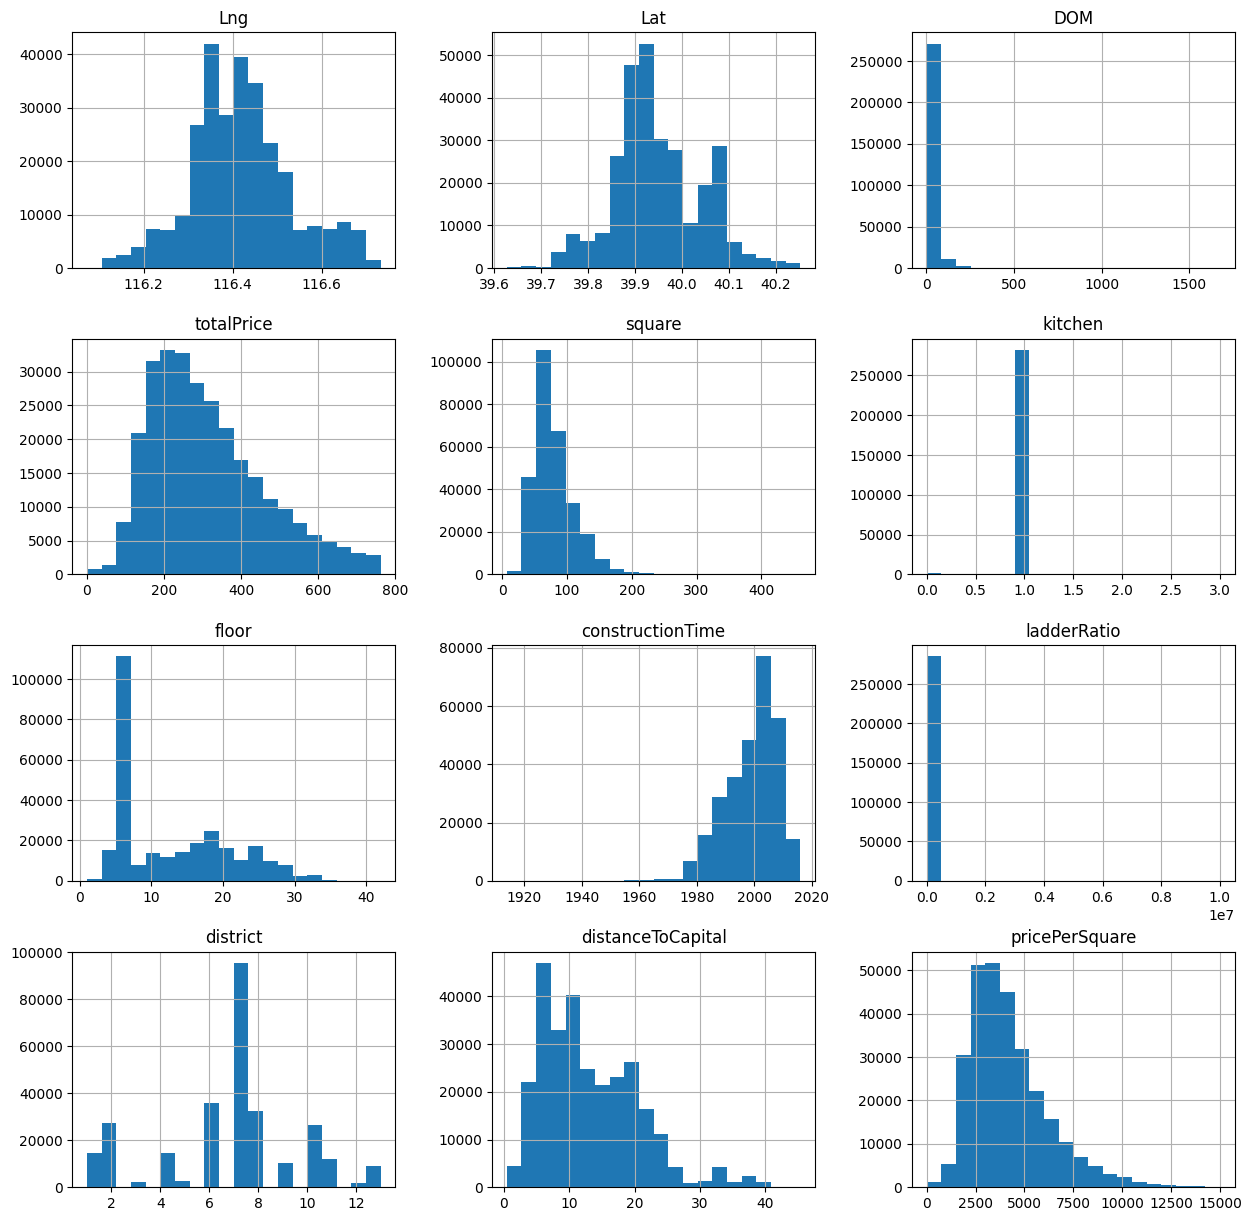

In [25]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Visualization: Part 1
</font>
</h2>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
We want to use the new column we created and see how the price per square meter of the house changes as we move away from the city center. For this, I can use Seaborn's <code>regplot</code> chart, which, in addition to displaying the points, shows the trend of the data with regression.
<br> <i>Running this cell might take a few minutes.</i>
</font>
</p>

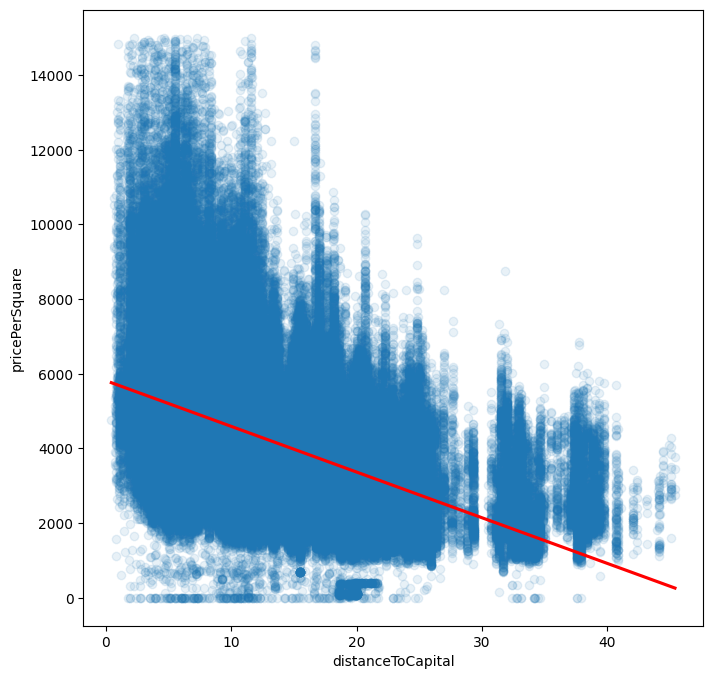

In [26]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this section, we want to examine the effect of the presence of an elevator on the <b>price per square meter</b>.
<br>
Different charts can be used for this. For example, with the help of a bar graph, you can compare the average price of houses with and without an elevator, or with the help of a box graph, you can draw a graph that shows the distribution of their prices. <br> I use a kde plot for comparison.
</font>
</p>

''

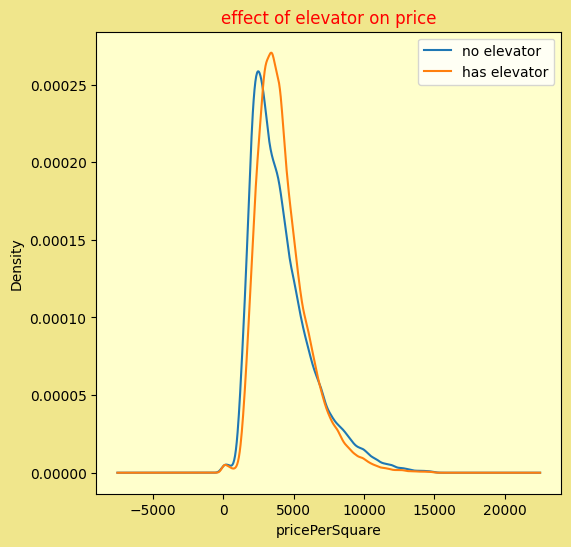

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
fig.set_facecolor("khaki")
ax.set_facecolor("#ffffcc")

housing_PPS[housing_PPS["elevator"] == "no elevator"].pricePerSquare.plot(kind = 'kde', ax = ax, label="no elevator")
housing_PPS[housing_PPS["elevator"] == "has elevator"].pricePerSquare.plot(kind = 'kde', ax = ax, label="has elevator")

ax.legend()
ax.set_title("effect of elevator on price",color="red")
ax.set_xlabel("pricePerSquare")
;

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Visualization: Part 2
</font>
</h2>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In the data set of Chinese houses, the geographical coordinates of each house are known. Using <code>scatter</code>, houses can be plotted based on their location on the map and then analyzed. Very useful information can be extracted from these maps. The density of different areas, the characteristics of houses in each area (having an elevator, square footage, price, etc.) are some of the information that can be obtained from this chart. <br> In this step of the project, I will draw such diagrams.
</font> 
</p>

In [28]:
housing_sample = housing_PPS.iloc[:-100:100]
housing_sample.shape

(2850, 20)

<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
You can see that most of the houses are gathered in one point, which is the center of the Chinese capital.
</font>
</p>

''

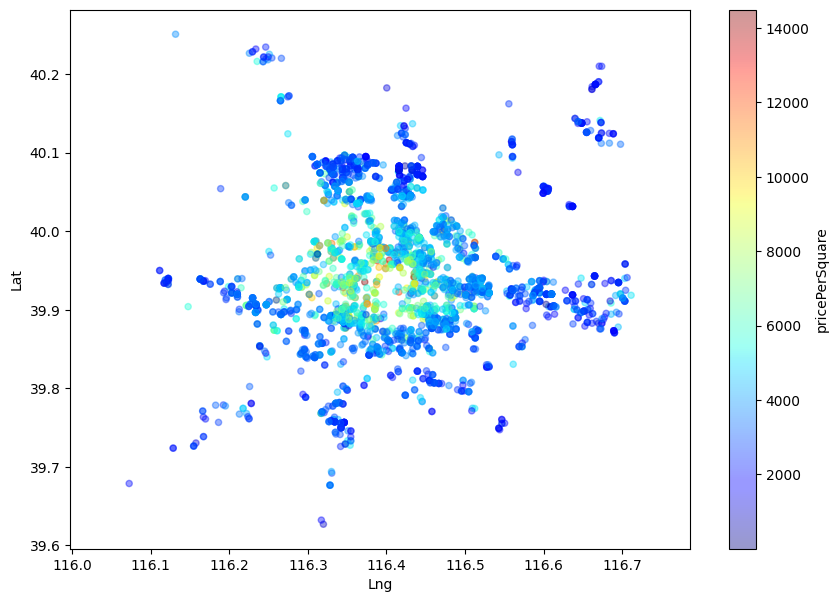

In [29]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax2, kind='scatter', alpha=0.4,
                    c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax2.axis('equal')
;

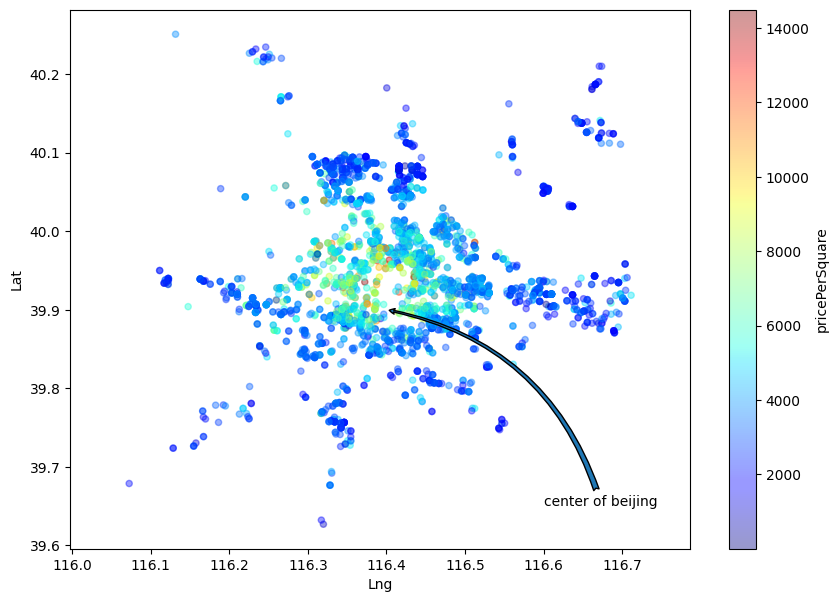

In [30]:
from matplotlib.patches import ConnectionStyle
connectionstyle = ConnectionStyle("Arc3", rad=0.3)

ax2.annotate("center of beijing",xy=(116.40, 39.90), xytext=(116.6 , 39.65), arrowprops=dict(arrowstyle="fancy", connectionstyle=connectionstyle))
fig2

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Now I specify the size of the points with the <code>s</code> variable. I can choose <code>'distanceToCapital'</code> as a measure of point size.
</font>
</p>

''

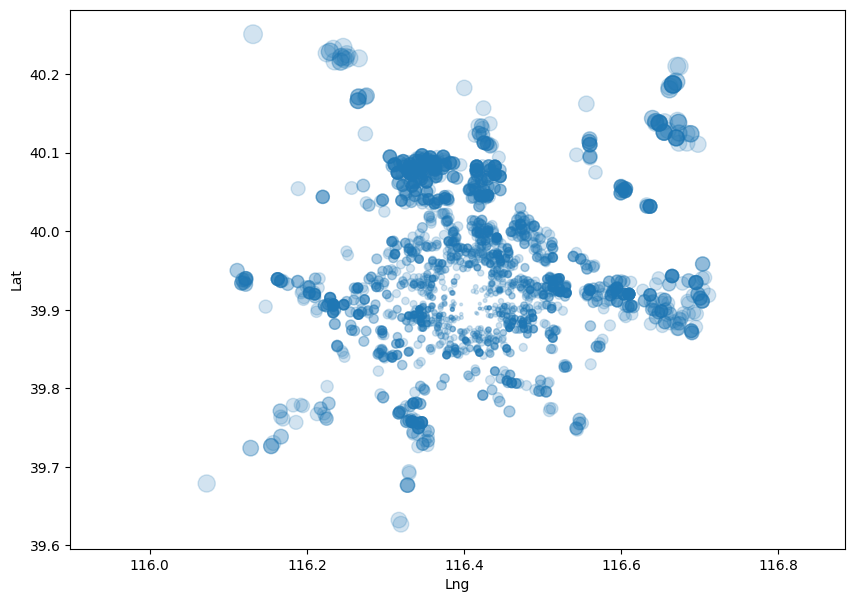

In [31]:
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax3, kind = 'scatter', alpha = 0.2,\
    s = housing_sample['distanceToCapital'] * 4)

ax3.axis('equal')
;

<p style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
The photo of this area can be placed behind the drawn points to get a more realistic view of the location of the houses. Using the range of the horizontal and vertical axis of the chart, I got the desired range using Google Maps, which is stored in <code>map1</code>. Using the <code>imshow</code> method, I put this picture behind the chart:
</font>
</p>

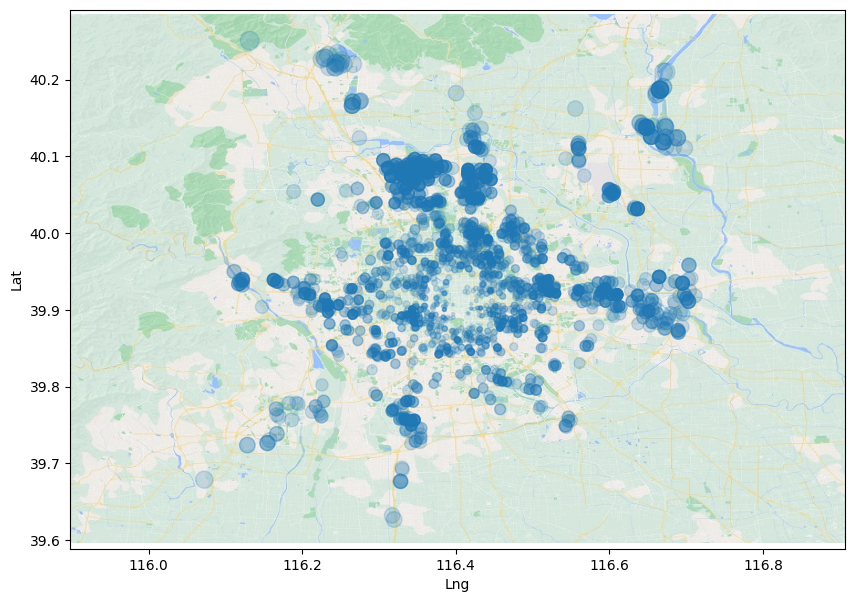

In [32]:
import matplotlib.image as mpimg

beijing_img = mpimg.imread('map1.jpg')
ax3.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
fig3

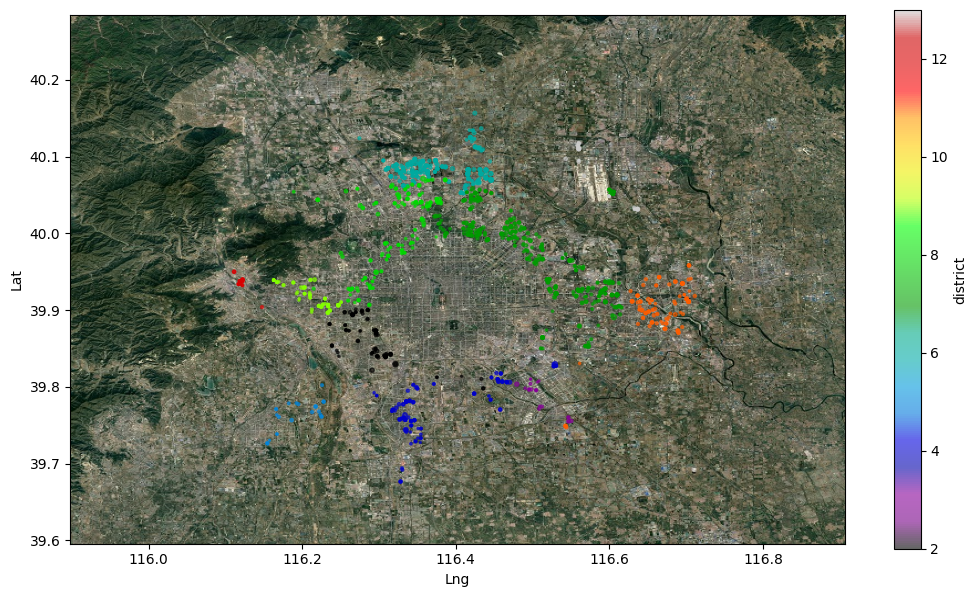

In [33]:
fig5, ax5 = plt.subplots()
fig5.set_size_inches(12.5, 7)

a = housing_sample[(housing_sample["distanceToCapital"] > 10) & (housing_sample["distanceToCapital"] < 30)].copy()

a.plot(x='Lng', y='Lat', ax=ax5, kind='scatter', alpha=0.6, c='district', cmap=plt.get_cmap("nipy_spectral"), colorbar=True, s = a['square'] / 20)


beijing_img = mpimg.imread('map2.jpg')
ax5.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])


<h1  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Time Series Analysis
</font>
</h1>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In the last step of the project, I get a comprehensive report on the characteristics of each area. I also perform two time series analyzes using the trading time.
</font> 
</p>

<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Time Series Analysis: Part 1
</font>
</h2>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In the first part, I want to get information for each <code>district</code>.
I created a dataframe named <code>districts_df</code> and set its <code>index</code> to the <code>district</code> column.
<br> Then I calculated the following for each area:
</font>
</p>

<center>
<div  style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| Column | Description |
| :---: | :---: |
| <code dir=ltr>pricePerSquare mean</code> | Average price per square meter |
| <code dir=ltr>% houses with elevator</code> | The percentage of houses that have elevators |
| <code dir=ltr>% houses with subway</code> | The percentage of houses that have access to the subway |
| <code dir=ltr>square mean</code> | Average size of houses |
| <code dir=ltr>building age mean</code> | The average age of houses (the age of each house is calculated until 2021.) |
| <code dir=ltr>frequent buildingStructure</code> | The most common type of building |

</font>
</div>
</center>

In [34]:
grouped = housing_PPS.groupby('district')

# pricePerSquare_mean
pricePerSquare_mean = grouped["pricePerSquare"].agg('mean')

# % houses with elevator
has_elevator = housing_PPS[housing_PPS['elevator'] == 'has elevator'].groupby('district')['elevator'].agg('count')
all_elevator = grouped['elevator'].agg('count')
houses_with_elevator = (has_elevator / all_elevator) * 100

# % houses with subway
has_sub = housing_PPS[housing_PPS['subway'] == 'has subway'].groupby('district')['subway'].agg('count')
all_sub = grouped['subway'].agg('count')
houses_with_sub = (has_sub / all_sub) * 100

# square mean
square_mean = grouped["square"].agg('mean')

# building age mean
age_temp = housing_PPS.copy()
age_temp['constructionTime'] = 2021 - age_temp['constructionTime']
grouped = age_temp.groupby('district')
building_age_mean = grouped["constructionTime"].agg('mean')

# frequent buildingStructure
frequent_buildingStructure = grouped["buildingStructure"].agg(pd.Series.mode)

dis_dic = {
    "pricePerSquare mean": pricePerSquare_mean,
    "% houses with elevator": houses_with_elevator,
    "% houses with subway": houses_with_sub,
    "square mean": square_mean,
    "building age mean": building_age_mean,
    "frequent buildingStructure": frequent_buildingStructure
}
districts_df = pd.DataFrame(dis_dic, index=housing_PPS["district"].sort_values().unique()).rename_axis('district')
districts_df

,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,building age mean,frequent buildingStructure
district,,,,,,
1,5981.774965,56.216550,93.488404,67.047856,25.151709,steel-concrete composite
2,3805.924811,68.647623,61.825544,76.951352,20.639123,steel-concrete composite
3,3130.333142,66.636691,47.032374,92.071484,15.494604,steel-concrete composite
4,2999.928821,39.983398,43.027117,86.322272,18.324364,mixed
5,2841.761483,80.077031,39.005602,89.297990,11.271359,steel-concrete composite
6,2952.222451,37.892663,43.553669,100.121614,17.536464,mixed
7,4225.965657,66.746216,68.307898,78.845544,22.553717,steel-concrete composite
8,5312.914827,51.883462,61.087404,73.615248,24.191570,steel-concrete composite
9,3491.126972,46.534461,27.636823,73.047513,25.653835,steel-concrete composite


<h2  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Time Series Analysis: Part 2
</font>
</h2>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
According to local people, house prices have been falling for several months and this trend is expected to continue. In this section, I want to check the validity of this hypothesis.
</font>
</p>

In [35]:
housing_PPS['tradeTime'] = pd.to_datetime(housing_PPS['tradeTime'])

''

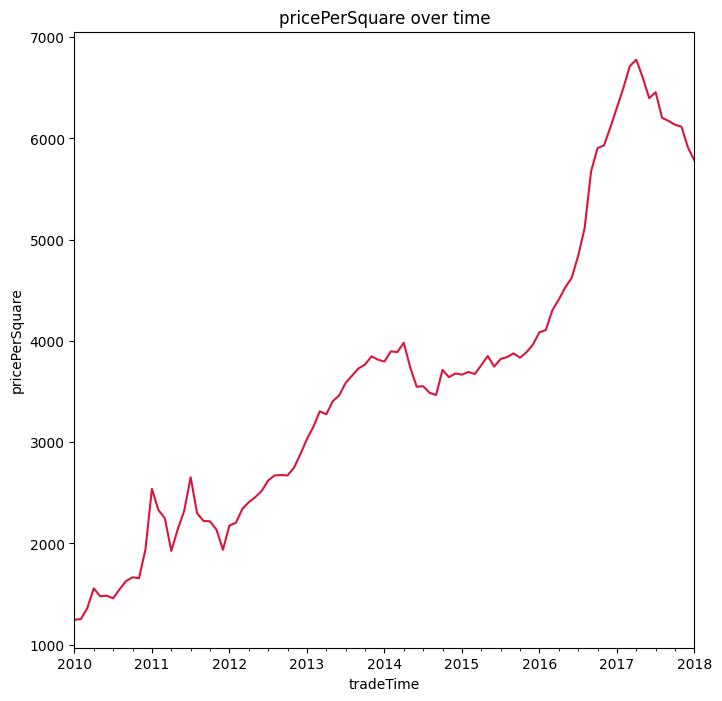

In [37]:
temp = housing_PPS[housing_PPS.tradeTime >= '2010'].copy()
resample_data = temp.resample(rule='M', on='tradeTime')["pricePerSquare"].agg('mean')

fig1 , ax1 = plt.subplots(figsize=(8, 8))
ax1.set_title("pricePerSquare over time")
ax1.set_xlabel("tradeTime")
ax1.set_ylabel("pricePerSquare")
resample_data.plot(x = resample_data.index, y = resample_data.values, color = "crimson")
;

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
So obviously this hypothesis is wrong!!!
</font>
</p>

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Another rumor I'd like to check out is the decline of home sales near downtown.
</font>
</p>

''

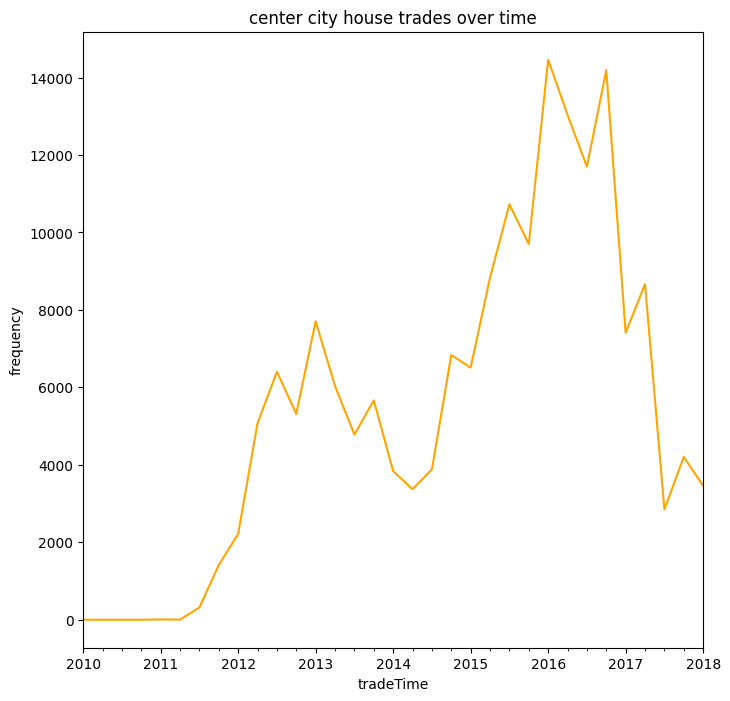

In [38]:
temp_2 = housing_PPS[housing_PPS.tradeTime >= '2010'].copy()
resample_data_2 = temp_2.resample(rule='3M', on='tradeTime').distanceToCapital.apply(lambda x: np.count_nonzero(x < 15))

fig2 , ax2 = plt.subplots(figsize=(8, 8))
ax2.set_title("center city house trades over time")
ax2.set_xlabel("tradeTime")
ax2.set_ylabel("frequency")
resample_data_2.plot(x = resample_data_2.index, y = resample_data_2.values, color = "orange")
;

<p  style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
This hypothesis is partially true. As of mid-2016 the number of houses that were sold has declined substantially.
</font>
</p>

<center>
<h1  style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
THE END
</font>
</h1>
</center>